# Imports

In [1]:
import os  
import glob
import sklearn
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix


import PIL 
import random
import numpy as np
import matplotlib.pyplot as plt 

from tool_preprocessing import *

# Preprocessing

In this notebook, labels are initially considered as categorical.

## Manual Part

If the images are organized in the folders of each label, the following flag must be True

Grande Osmar, deixa a False como True mesmo

In [2]:
flag_folder_sep = False

In [3]:
if flag_folder_sep:
    # base_path = input("Qual é o caminho do dataset?")
    base_path = 'C:/Users/Lucas Lessa/OneDrive/Documentos/UnB/Semestres-ENE/TCC/COVID_Dataset_original'
    # results_path = f"C:/Users/Lucas/medical_images_models/results_COVID"
else:
    base_path = 'C:/Users/Lucas Lessa/OneDrive/Documentos/UnB/Semestres-ENE/TCC/The HAM10000 dataset'
    # results_path = f"results_HAM/"
    # base_path = input("Qual é o caminho do dataset?")
    # results_path = input("Qual será o caminho para os resultados?")


In [4]:
if flag_folder_sep :
    label_column = 'label'
    train_df, test_df, val_df  = make_dataset_by_folder(base_path=base_path, label_column=label_column)

else:
    
    path_train_df = f'{base_path}/HAM10000_metadata'
    path_test_df = f'{base_path}/test.csv'
    
    path_train = f"{base_path}/treino"
    path_test = f"{base_path}/test"
    
    paths_image = [path_train, path_test]
    paths_df = [path_train_df, path_test_df]
    label_column = 'dx'
    
    train_df, test_df, val_df = make_dataset_by_df(paths_image, paths_df, label_column=label_column)
    
    

nv - 671
mel - 112
bkl - 110
bcc - 52
akiec - 33
vasc - 15
df - 12


## Analysis

### Train

In [5]:
train_df = check_images_existence(train_df, path_column='path')

In [6]:
train_df.to_csv("teste.csv")

In [7]:
image_analysis_train = image_analysis(train_df)

Smallest pixel value: 0
Largest pixel value: 255
Total images processed: 9010
Channel Statistics:
Channel 'R':
  - Average: 194.68187054753977
  - Standard Deviation: 22.791095609509448
Channel 'G':
  - Average: 139.18874363628888
  - Standard Deviation: 30.127021221194617
Channel 'B':
  - Average: 145.4035463994738
  - Standard Deviation: 33.85997329924692


In [8]:
dict_train_qntd = get_label_counts_and_print(train_df, label_column=label_column)
shapes_train = analyze_image_shapes(train_df, min_shape=(800, 800), path_column='path')

Total number of images: 9010
Number of unique labels: 7
Label 'nv' has 6034 images.
Label 'mel' has 1001 images.
Label 'bkl' has 989 images.
Label 'bcc' has 462 images.
Label 'akiec' has 294 images.
Label 'vasc' has 127 images.
Label 'df' has 103 images.
Average image shape - Height: 450.0, Width: 600.0
Number of images with shape smaller than (800, 800): 9010


In [9]:
dict_train_qntd

{'nv': 6034,
 'mel': 1001,
 'bkl': 989,
 'bcc': 462,
 'akiec': 294,
 'vasc': 127,
 'df': 103}

### Test

In [10]:
test_df = check_images_existence(test_df, path_column='path')

Image not found in folder: None
Removed lines:
lesion_id       HAMTEST_0000496
image_id           ISIC_0035068
dx                           nv
dx_type               consensus
age                         NaN
sex                         NaN
localization                NaN
dataset                     NaN
path                       None
Name: 534, dtype: object


In [11]:
image_analysis_test = image_analysis(test_df)

Smallest pixel value: 0
Largest pixel value: 255
Total images processed: 1511
Channel Statistics:
Channel 'R':
  - Average: 193.96235187636344
  - Standard Deviation: 24.606448726550262
Channel 'G':
  - Average: 141.7550379243572
  - Standard Deviation: 31.9625774054364
Channel 'B':
  - Average: 147.87214814814814
  - Standard Deviation: 35.78649271231254


In [12]:
dict_test_qntd = get_label_counts_and_print(test_df, label_column=label_column)
shapes_test = analyze_image_shapes(test_df, min_shape=(300, 300), path_column='path')

Total number of images: 1511
Number of unique labels: 7
Label 'nv' has 908 images.
Label 'bkl' has 217 images.
Label 'mel' has 171 images.
Label 'bcc' has 93 images.
Label 'df' has 44 images.
Label 'akiec' has 43 images.
Label 'vasc' has 35 images.
Average image shape - Height: 450.0, Width: 600.0
Number of images with shape smaller than (300, 300): 0


### Validation

In [13]:
val_df = check_images_existence(val_df, path_column='path')

In [14]:
image_analysis_val = image_analysis(val_df)

Smallest pixel value: 0
Largest pixel value: 255
Total images processed: 1005
Channel Statistics:
Channel 'R':
  - Average: 194.84180818500093
  - Standard Deviation: 23.428856516708883
Channel 'G':
  - Average: 139.9250088557214
  - Standard Deviation: 30.539483110296192
Channel 'B':
  - Average: 146.21765087525336
  - Standard Deviation: 34.290640143609394


In [15]:
dict_val_qntd = get_label_counts_and_print(val_df, label_column=label_column)
shapes_val = analyze_image_shapes(val_df, min_shape=(461, 601), path_column='path')

Total number of images: 1005
Number of unique labels: 7
Label 'nv' has 671 images.
Label 'mel' has 112 images.
Label 'bkl' has 110 images.
Label 'bcc' has 52 images.
Label 'akiec' has 33 images.
Label 'vasc' has 15 images.
Label 'df' has 12 images.
Average image shape - Height: 450.0, Width: 600.0
Number of images with shape smaller than (461, 601): 1005


## Model Preparation

In [16]:
from model_preprocessing import *

Passar de categorial para binário 

Pesos para a loss

### Categorial to number

In [17]:
labels_dict = labels2dict(train_df, label_column)
labels_dict

{'nv': 0, 'mel': 1, 'bkl': 2, 'bcc': 3, 'akiec': 4, 'vasc': 5, 'df': 6}

In [18]:
train_label, test_label, val_label = dflabel2number([train_df, test_df, val_df], labels_dict, label_column)

### Weights

In [19]:
if len(labels_dict) == 1:
    weights = calculate_weights(train_df, labels_dict, dict_train_qntd)
    weights = max(weights)
else:
    weights = calculate_weights(train_df, labels_dict, dict_train_qntd)
    print(weights)

[0.21331502438562433, 1.2858570001427145, 1.3014589050989456, 2.7860235003092146, 4.3780369290573375, 10.13498312710911, 12.496532593619973]


# Model

In [20]:
from models import *
from torch.utils.data import DataLoader, Dataset
from torchvision.transforms import transforms

## Dataset Class

In [21]:
class CT_Dataset(Dataset):
    def __init__(self, img_path, img_labels, channels, img_transforms=None):
        self.img_path = img_path
        self.img_labels = torch.Tensor(img_labels)
        if channels == 1:
            self.transforms = transforms.Compose([transforms.Grayscale(),
                                                #   transforms.Resize((250, 250)),
                                                  transforms.ToTensor()])
        elif channels == 3:
            self.transforms = transforms.Compose([#transforms.Resize((250, 250)),
                                                  transforms.ToTensor()])
        else:
            self.transforms = img_transforms
    
    def __getitem__(self, index):
        # load image
        cur_path = self.img_path[index]
        cur_img = PIL.Image.open(cur_path).convert('RGB')
        cur_img = self.transforms(cur_img)

        return cur_img, self.img_labels[index]
    
    def __len__(self):
        return len(self.img_path)

## GPU

In [22]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device 

device(type='cuda')

In [23]:
print("Current GPU memory usage:", torch.cuda.memory_allocated() / (1024 ** 2), "MB")
print("Max GPU memory usage:", torch.cuda.max_memory_allocated() / (1024 ** 2), "MB")

torch.cuda.empty_cache()

Current GPU memory usage: 0.0 MB
Max GPU memory usage: 0.0 MB


## Random Seed

In [24]:
random_seed = 124
np.random.seed(random_seed)

torch.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True

## Training

In [25]:
try:
    mean_R = image_analysis_val['channel_statistics']['R']['average']
    mean_G = image_analysis_val['channel_statistics']['G']['average']
    mean_B = image_analysis_val['channel_statistics']['B']['average']
    channels = 1 if mean_R == mean_G == mean_B else 3
    
except KeyError:
    channels = image_analysis_val['channels']

In [26]:
train_dataset = CT_Dataset(img_path=np.array(train_df['path']), img_labels=np.array(train_label), channels=channels)
val_dataset = CT_Dataset(img_path=np.array(val_df['path']), img_labels=np.array(val_label), channels=channels)
test_dataset = CT_Dataset(img_path=np.array(test_df['path']), img_labels=np.array(test_label), channels=channels)

In [27]:
from trainer import *

In [28]:
batch_size = 4
Epochs = 20



# model_kernel = VGG16(num_classes=len(labels_dict), input_channels=channels)
# model_kernel = ResNet50(num_classes=len(labels_dict), input_channels=channels)
# model_kernel = ResNet101(num_classes=len(labels_dict), input_channels=channels)
# model_kernel = EfficientNetB0(num_classes=len(labels_dict), input_channels=channels)
model_kernel = EfficientNetB4(num_classes=len(labels_dict), input_channels=channels)
# model_kernel = EfficientNetB7(num_classes=len(labels_dict), input_channels=channels)



trainer = ModelTrainer(model_kernel, device, weights, labels_dict, train_dataset, val_dataset, test_dataset, batch_size= batch_size, epochs=Epochs)

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b4-6ed6700e.pth" to C:\Users\Lucas Lessa/.cache\torch\hub\checkpoints\efficientnet-b4-6ed6700e.pth
100%|██████████| 74.4M/74.4M [00:02<00:00, 28.3MB/s]


Loaded pretrained weights for efficientnet-b4


In [29]:
trainer.loader()
trainer.loss_function()
trainer.optimizer_step()
print("Training Start:")
for epoch in range(Epochs):
    trainer.model.train()

    trainer.train_loss = 0
    trainer.train_acc = 0

    trainer.train()
    trainer.validate()
    history = trainer.loss_acc()


    print(f"Epoch:{epoch + 1} / {Epochs}, lr: {trainer.optimizer.param_groups[0]['lr']:.5f} train loss:{trainer.train_loss:.5f}, train acc: {trainer.train_acc:.5f}, valid loss:{trainer.val_loss:.5f}, valid acc:{trainer.val_acc:.5f}")
        
    # Update the best model if validation loss is the lowest so far
    if trainer.val_loss < trainer.best_val_loss:
        trainer.best_val_loss = trainer.val_loss
        trainer.best_model_state = trainer.model.state_dict()

    print(f'The best val loss is {trainer.best_val_loss}.\n')
    
    # Load the best model state
    if trainer.best_model_state is not None:
        trainer.model.load_state_dict(trainer.best_model_state)
    model = trainer.model
    
trainer.test()
metrics_df = trainer.metrics()

Training Start:
Epoch:1 / 20, lr: 0.00010 train loss:1.09438, train acc: 0.70273, valid loss:0.52654, valid acc:0.80258
The best val loss is 0.5265401005744934.

Epoch:2 / 20, lr: 0.00010 train loss:0.69255, train acc: 0.79527, valid loss:0.53957, valid acc:0.81746
The best val loss is 0.5265401005744934.

Epoch:3 / 20, lr: 0.00010 train loss:0.47429, train acc: 0.85042, valid loss:0.62153, valid acc:0.77480
The best val loss is 0.5265401005744934.

Epoch:4 / 20, lr: 0.00010 train loss:0.32101, train acc: 0.89203, valid loss:0.87936, valid acc:0.77083
The best val loss is 0.5265401005744934.

Epoch:5 / 20, lr: 0.00010 train loss:0.24667, train acc: 0.91411, valid loss:0.59329, valid acc:0.86706
The best val loss is 0.5265401005744934.

Epoch:6 / 20, lr: 0.00010 train loss:0.17985, train acc: 0.93753, valid loss:0.54480, valid acc:0.82540
The best val loss is 0.5265401005744934.

Epoch:7 / 20, lr: 0.00005 train loss:0.14064, train acc: 0.94818, valid loss:0.48796, valid acc:0.88294
The 

In [30]:
metrics_df = trainer.metrics()
metrics_df = metrics_df.applymap(lambda x: str(x).replace('.', ','))

# Metrics

In [31]:
from model_metrics import *                                                                         

In [43]:

if flag_folder_sep:
    results_path = f"C:/medical_images_models/results_COVID/Model_{model.get_name()}__Epoch_{Epochs}__Batch_{batch_size}__Accuracy_{metrics_df['Accuracy'][0]}"

else:
    # results_path = f"C:/medical_images_models/results_HAM/Model_{model.get_name()}__Epoch_{Epochs}__Batch_{batch_size}__Accuracy_{metrics_df['Accuracy'][0]}"
    results_path = f"C:/Users/Lucas Lessa/OneDrive/Documentos/UnB/Semestres-ENE/TCC/The HAM10000 dataset/Resultados/" #Model_{model.get_name()}__Epoch_{Epochs}__Batch_{batch_size}__Accuracy_{metrics_df['Accuracy'][0]}"

In [44]:
results_path

'C:/Users/Lucas Lessa/OneDrive/Documentos/UnB/Semestres-ENE/TCC/The HAM10000 dataset/Resultados/'

In [33]:
metrics_df

Class           Precision              Recall            F1-Score  \
0     nv   0,893970893970894   0,947136563876652  0,9197860962566845   
1    mel           0,7265625   0,543859649122807  0,6220735785953178   
2    bkl   0,803030303030303  0,7327188940092166  0,7662650602409639   
3    bcc  0,8409090909090909  0,7956989247311828  0,8176795580110496   
4  akiec  0,5510204081632653   0,627906976744186  0,5869565217391305   
5   vasc  0,7804878048780488  0,9142857142857143  0,8421052631578947   
6     df  0,7111111111111111  0,7272727272727273  0,7191011235955056   

             Accuracy       Best Val Loss True Negatives         specificity  \
0  0,8451356717405691  0,4350474178791046            501  0,8308457711442786   
1  0,8451356717405691  0,4350474178791046           1305  0,9738805970149254   
2  0,8451356717405691  0,4350474178791046           1255  0,9698608964451314   
3  0,8451356717405691  0,4350474178791046           1404  0,9901269393511989   
4  0,8451356717405691  0,4350474178791046           1446  0,9850136239782016   
5  0,8451356717405691  0,4350474178791046           1467  0,9939024390243902   
6  0,8451356717405691  0,4350474178791046           1454  0,9911383776414451   

          sensitivity False Positives False Negatives True Positives  
0   0,947136563876652             102              48            860  
1   0,543859649122807              35              78             93  
2  0,7327188940092166              39              58            159  
3  0,7956989247311828              14              19             74  
4   0,627906976744186              22              16             27  
5  0,9142857142857143               9               3             32  
6  0,7272727272727273              13              12             32

In [45]:
metrics_df.to_csv(f"{results_path}/Model_{model.get_name()}__Epoch_{Epochs}__Batch_{batch_size}__Accuracy_{metrics_df['Accuracy'][0]}.csv", index=False)

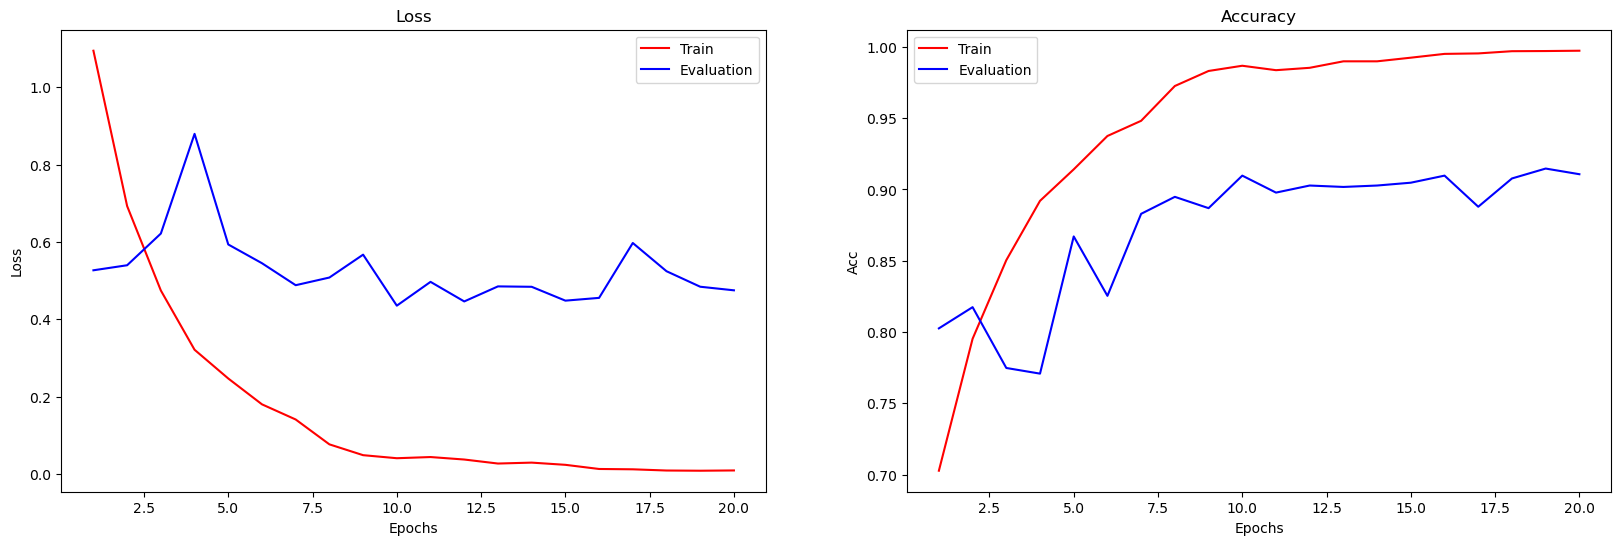

In [51]:
plot_metrics(history, path=f"{results_path}/Model_{model.get_name()}__Epoch_{Epochs}__Batch_{batch_size}__Accuracy_{metrics_df['Accuracy'][0]}")

## Plot Images - True Predicted

In [48]:
inverted_labels_dict = {value: key for key, value in labels_dict.items()}
inverted_labels_dict

{0: 'nv', 1: 'mel', 2: 'bkl', 3: 'bcc', 4: 'akiec', 5: 'vasc', 6: 'df'}

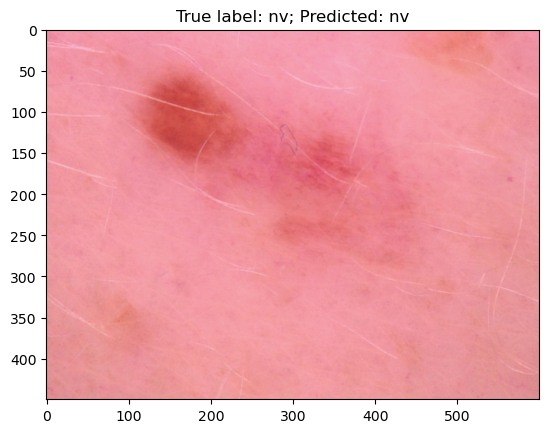

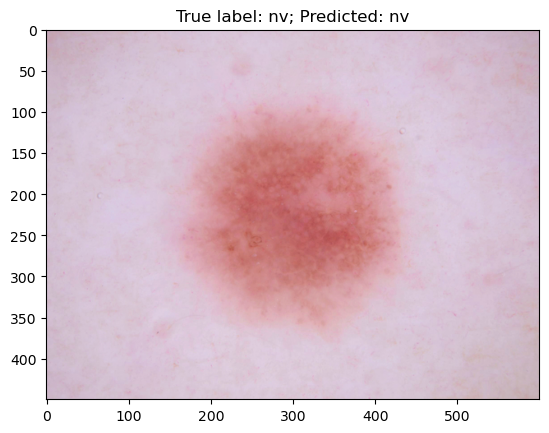

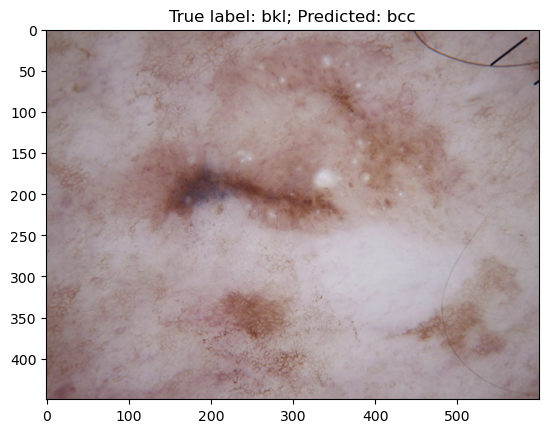

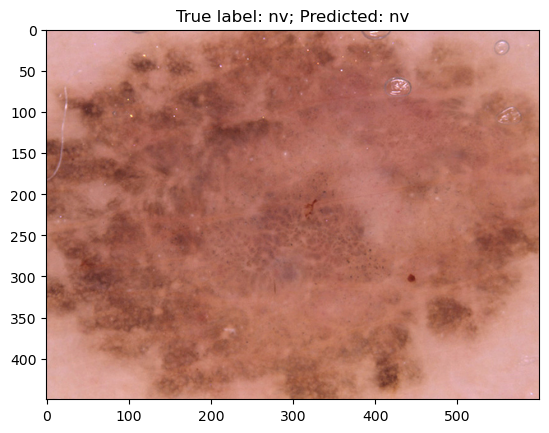

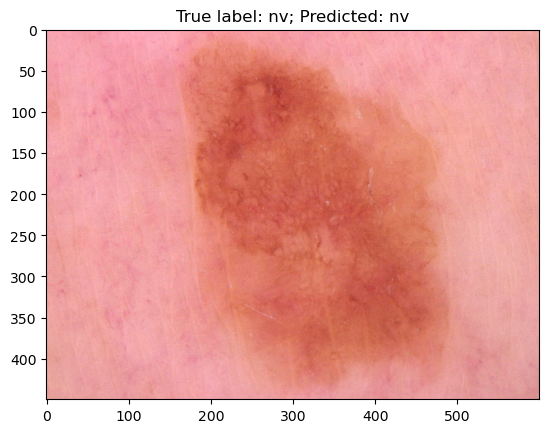

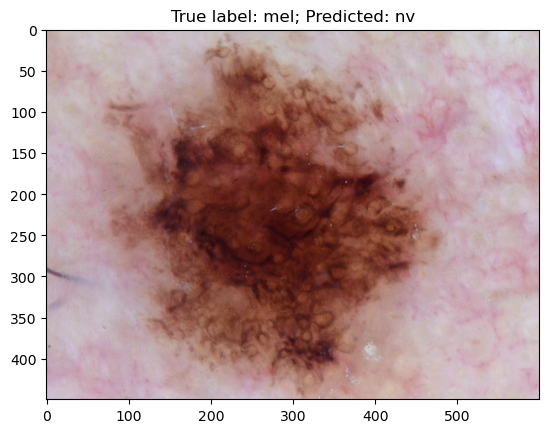

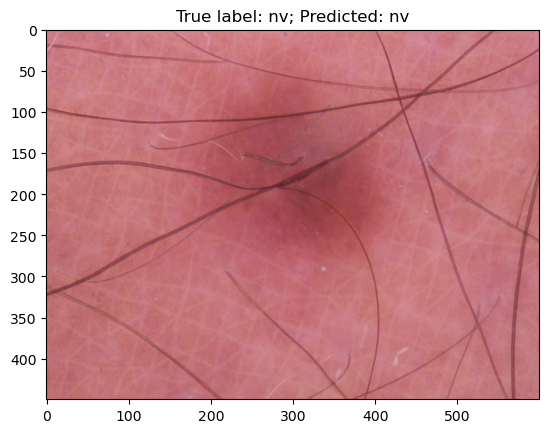

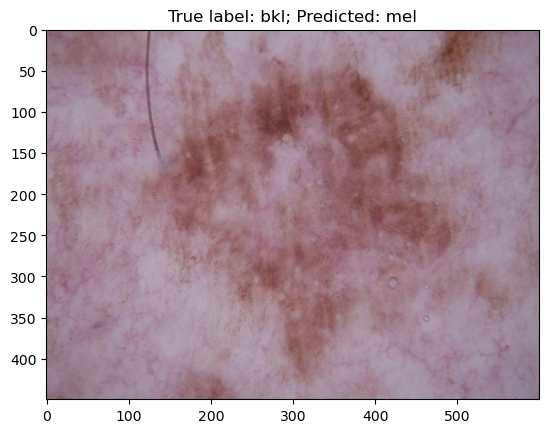

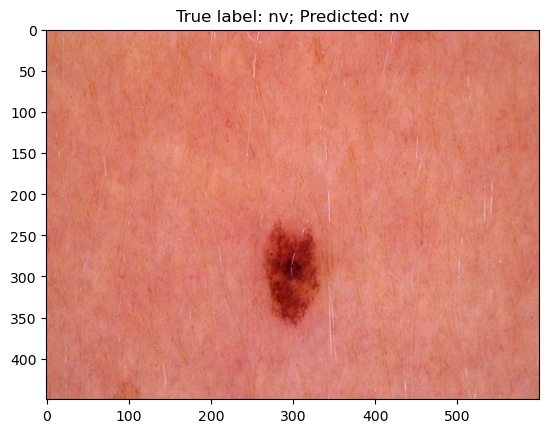

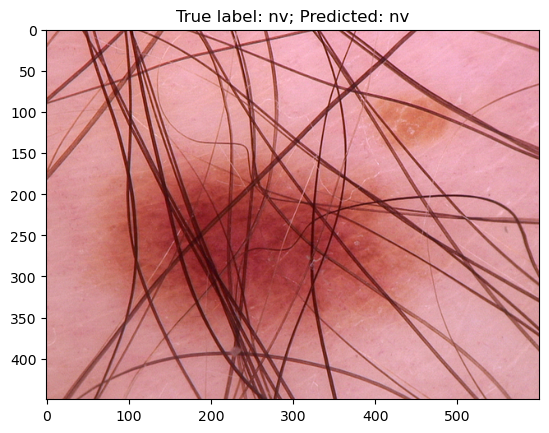

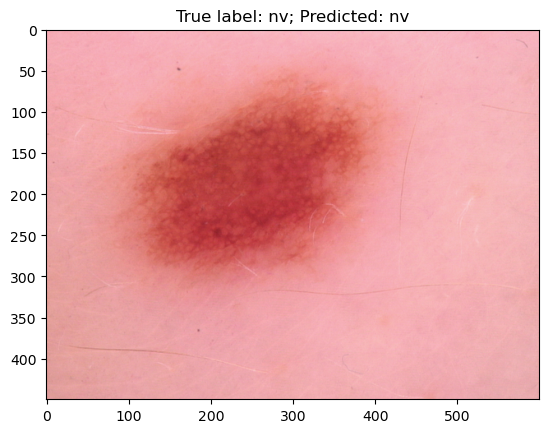

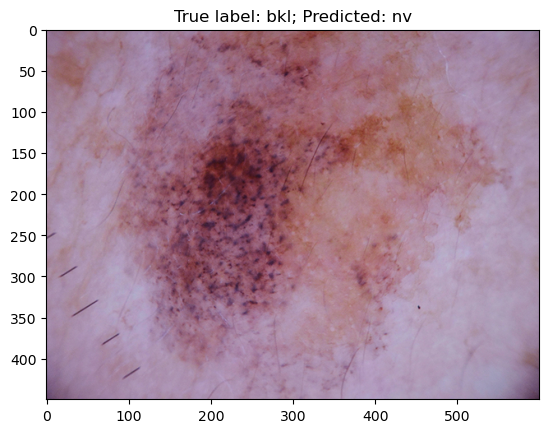

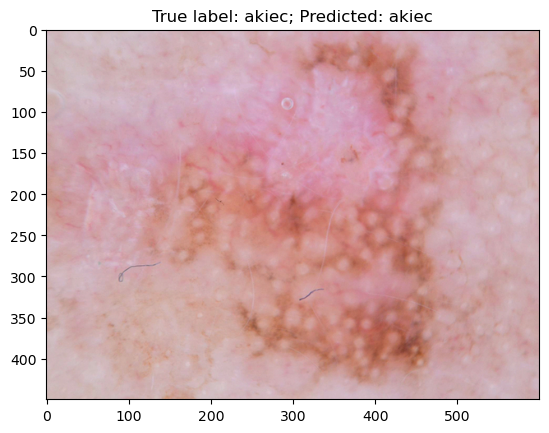

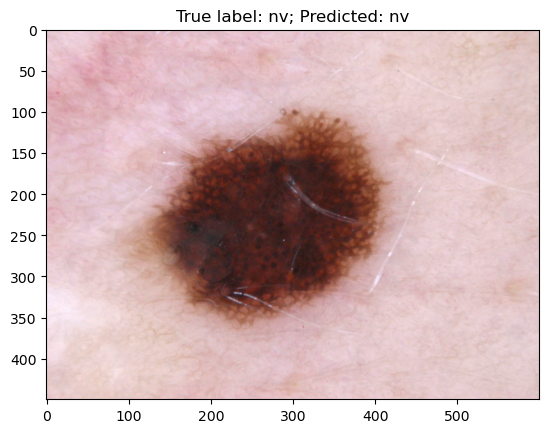

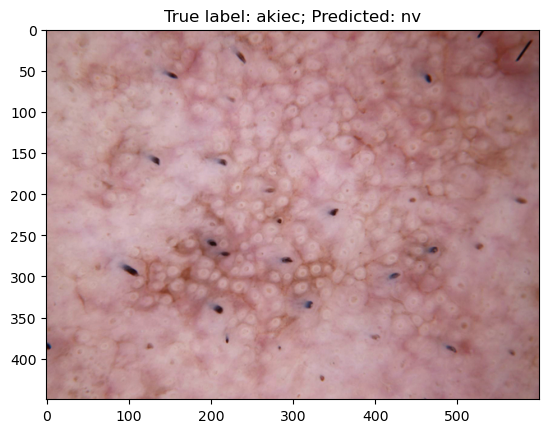

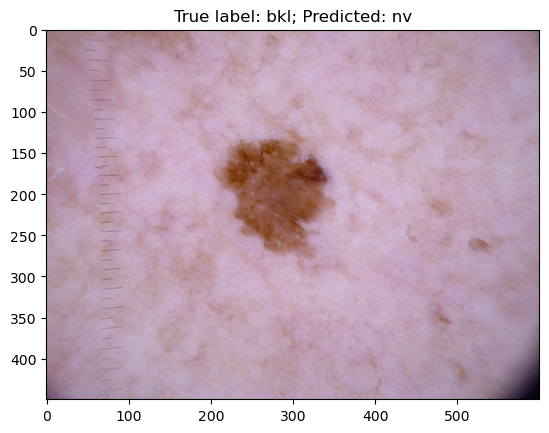

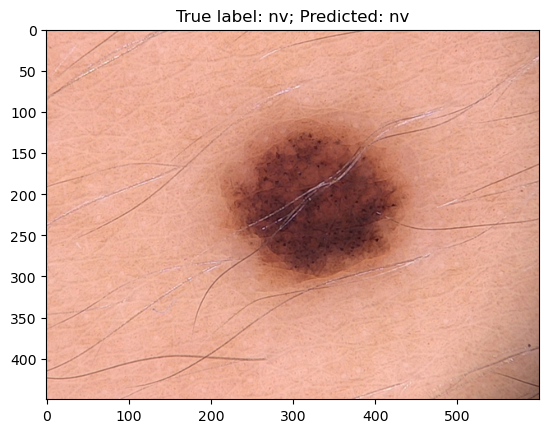

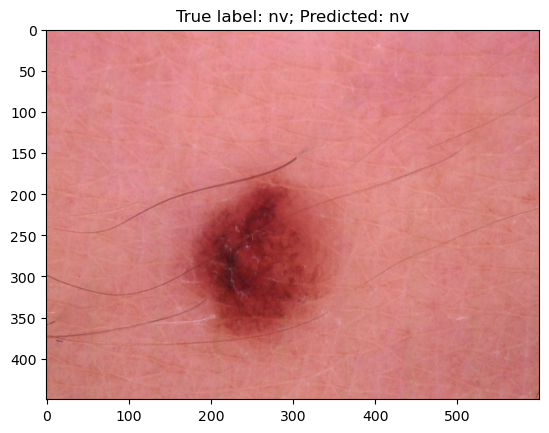

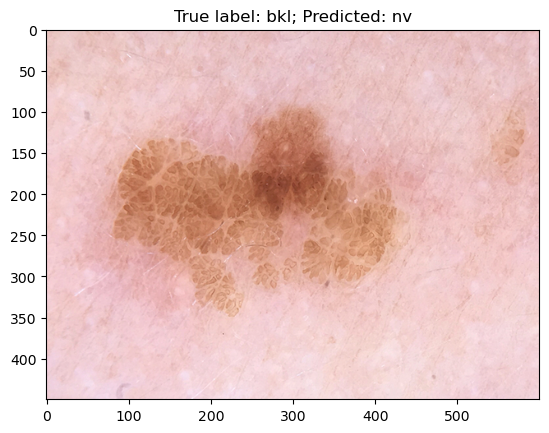

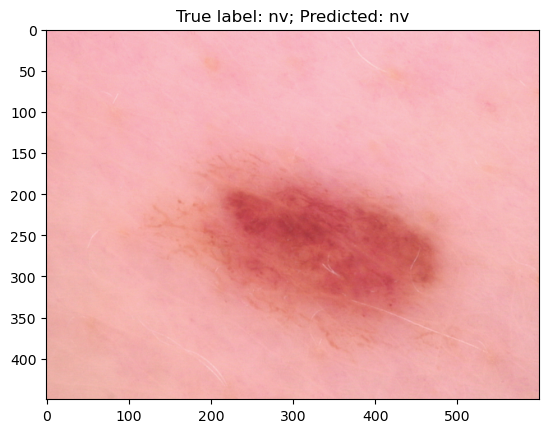

In [49]:
plot_image_pred_true(model, test_dataset, device, inverted_labels_dict, num_images_to_plot=20, plot_images=True)

# Save Model

In [50]:
torch.save(model.state_dict(), f"{results_path}/Model_{model.get_name()}__Epoch_{Epochs}__Batch_{batch_size}__Accuracy_{metrics_df['Accuracy'][0]}.pth")